# Florida Traffic Stops EDA

This notebook follows some more focused exploration of target-feature relationships. The takeaway from this exploration is that demographic features like driver and officer race, and location (county) of the traffic stop, should provide some predictive power. This is not surprising, but it's good to see such relationships manifest in simple exploration before building the model since it can guide what features to include at first.

### Imports and settings

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data

In [2]:
df = pd.read_pickle('data/df_fl_dropnas.pkl')

In [3]:
df.head()

,datetime,county_name,subject_age,subject_race,subject_sex,officer_age,officer_race,officer_sex,officer_years_of_service,violation,outcome,frisk_performed,search_conducted,search_basis,vehicle_registration_state,vehicle_region,day_of_week,month,time_of_day
1,2010-01-06 16:14:43,DUVAL,23.000,white,female,31.000,black,male,8.000,SPEED,citation,False,False,none,NC,South Atlantic,Wednesday,January,Midday
2,2010-01-08 19:39:31,DUVAL,45.000,white,female,29.000,white,male,3.000,ALCOHOL,arrest,False,False,none,FL,Instate,Friday,January,EveningRush
3,2010-01-11 11:56:34,ST LUCIE,41.000,white,male,26.000,white,male,3.000,LICENSE,arrest,False,False,none,FL,Instate,Monday,January,Midday
6,2010-01-15 09:18:02,GADSDEN,26.000,white,male,47.000,white,male,0.000,SPEED,warning,False,False,none,NY,Mid Atlantic,Friday,January,MorningRush
8,2010-01-15 12:30:12,LEON,26.000,hispanic,male,47.000,white,male,0.000,OTHER NON MOVING,warning,False,True,consent,FL,Instate,Friday,January,Midday


### Check the distribution of outcomes

In [4]:
df['outcome'].value_counts()

citation    2087957
warning      619428
arrest        98302
Name: outcome, dtype: int64

In [5]:
outcome = ['citation', 'warning', 'arrest']
for oc in outcome:
    print(df['outcome'].value_counts()[oc]/df.shape[0])

0.7441874307433438
0.22077587414419356
0.03503669511246265


Text(0.5, 1.0, 'Outcome Distribution')

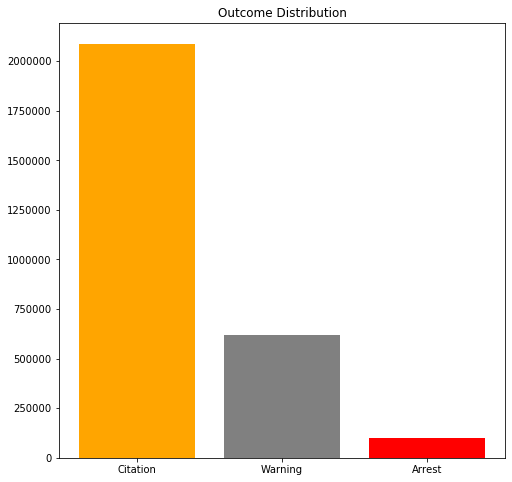

In [6]:
plot_d = {'Citation': np.sum(df['outcome'] == 'citation'), 
          'Warning': np.sum(df['outcome'] == 'warning'),
          'Arrest': np.sum(df['outcome'] == 'arrest')}
labels = list(plot_d.keys())
values = list(plot_d.values())

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(labels, values, color=['orange', 'gray', 'red'])
plt.title('Outcome Distribution')

### Outcomes by different groups

In [7]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = df.shape[0]
    n_citations = len(df[df['outcome'] == 'citation'])
    n_warnings = len(df[df['outcome'] == 'warning'])
    n_arrests = len(df[df['outcome'] == 'arrest'])
    n_searches = len(df[df['search_conducted'] == True])
    citations_per_warning = n_citations / n_warnings
    citation_rate = n_citations / n_total
    arrest_rate = n_arrests / n_total
    search_rate = n_searches / n_total
    
    return(pd.Series(data = { 
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'n_searches': n_searches,
        'citations_per_warning': citations_per_warning,
        'citation_rate': citation_rate,
        'arrest_rate': arrest_rate,
        'search_rate': search_rate
    }))

In [8]:
def plot_aggs(df, label, figsize=(10, 20), rotate_ticks=False):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=figsize)
    
    df.sort_values('citation_rate', ascending=False, inplace=True)
    ax1.bar(df.index, df['citation_rate'])
    ax1.set_title('Citation Rate by ' + label)
    
    df.sort_values('citations_per_warning', ascending=False, inplace=True)
    ax2.bar(df.index, df['citations_per_warning'])
    ax2.set_title('Citations Per Warning by ' + label)
    
    df.sort_values('arrest_rate', ascending=False, inplace=True)
    ax3.bar(df.index, df['arrest_rate'])
    ax3.set_title('Arrest Rate by ' + label)
    
    df.sort_values('search_rate', ascending=False, inplace=True)
    ax4.bar(df.index, df['search_rate'])
    ax4.set_title('Search Rate by ' + label)
    
    if rotate_ticks:
        ax1.tick_params(labelrotation=90)
        ax2.tick_params(labelrotation=90)
        ax3.tick_params(labelrotation=90)
        ax4.tick_params(labelrotation=90)

In [9]:
compute_outcome_stats(df)

n_total                 2805687.000
n_warnings               619428.000
n_citations             2087957.000
n_arrests                 98302.000
n_searches                17858.000
citations_per_warning         3.371
citation_rate                 0.744
arrest_rate                   0.035
search_rate                   0.006
dtype: float64

In [10]:
race_agg = df.groupby(['subject_race']).apply(compute_outcome_stats)
race_agg

,n_total,n_warnings,n_citations,n_arrests,n_searches,citations_per_warning,citation_rate,arrest_rate,search_rate
subject_race,,,,,,,,,
asian/pacific islander,36654.000,7444.000,28602.000,608.000,127.000,3.842,0.780,0.017,0.003
black,523415.000,104899.000,389354.000,29162.000,5747.000,3.712,0.744,0.056,0.011
hispanic,582343.000,94588.000,458953.000,28802.000,3676.000,4.852,0.788,0.049,0.006
other/unknown,74709.000,14060.000,58989.000,1660.000,289.000,4.196,0.790,0.022,0.004
white,1588566.000,398437.000,1152059.000,38070.000,8019.000,2.891,0.725,0.024,0.005


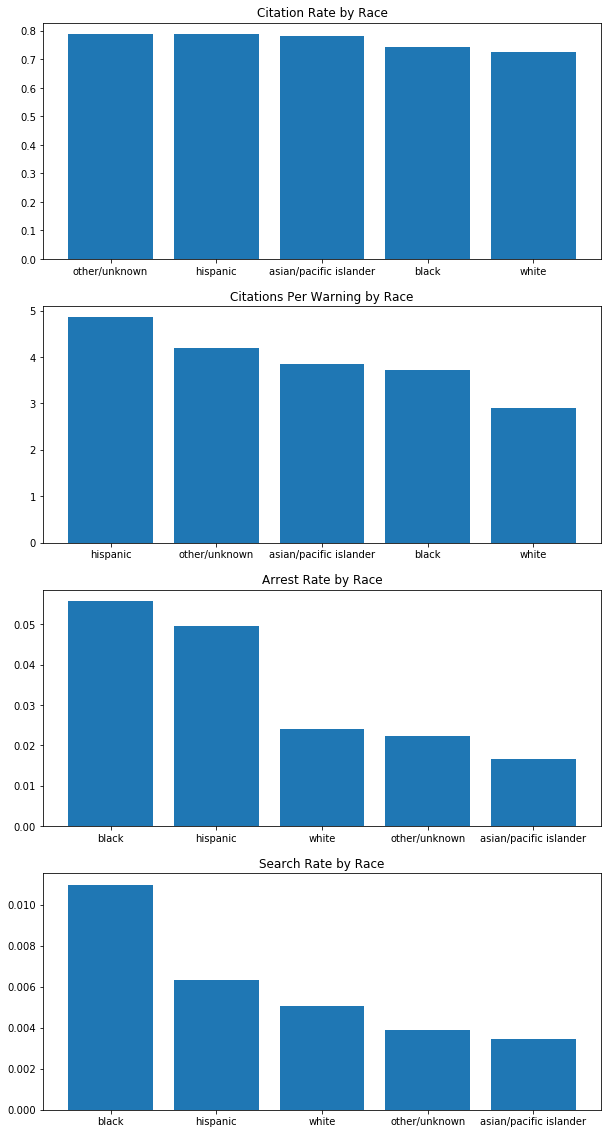

In [11]:
plot_aggs(race_agg, 'Race')

In [12]:
officer_race_agg = df.groupby(['officer_race']).apply(compute_outcome_stats)
officer_race_agg

,n_total,n_warnings,n_citations,n_arrests,n_searches,citations_per_warning,citation_rate,arrest_rate,search_rate
officer_race,,,,,,,,,
asian/pacific islander,20785.000,4316.000,15643.000,826.000,114.000,3.624,0.753,0.040,0.005
black,417676.000,76701.000,328153.000,12822.000,939.000,4.278,0.786,0.031,0.002
hispanic,379331.000,71478.000,294379.000,13474.000,1596.000,4.118,0.776,0.036,0.004
other/unknown,49216.000,8677.000,39324.000,1215.000,58.000,4.532,0.799,0.025,0.001
white,1938679.000,458256.000,1410458.000,69965.000,15151.000,3.078,0.728,0.036,0.008


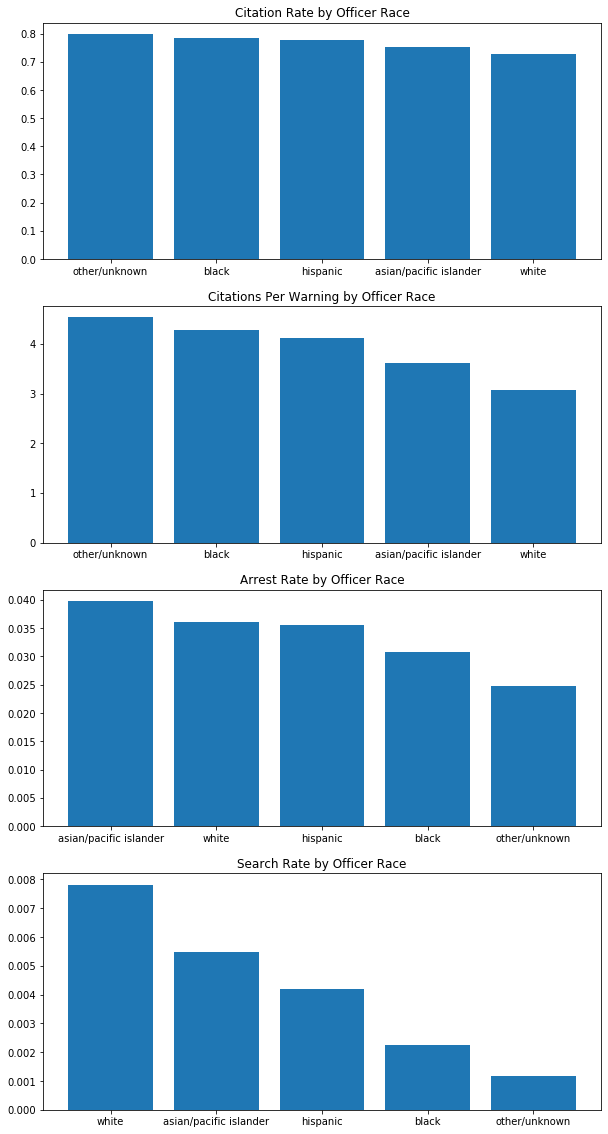

In [14]:
plot_aggs(officer_race_agg, 'Officer Race')

In [15]:
county_agg = df.groupby(['county_name']).apply(compute_outcome_stats)
county_agg

,n_total,n_warnings,n_citations,n_arrests,n_searches,citations_per_warning,citation_rate,arrest_rate,search_rate
county_name,,,,,,,,,
ALACHUA,40181.000,10634.000,28023.000,1524.000,831.000,2.635,0.697,0.038,0.021
BAKER,18535.000,3813.000,14189.000,533.000,42.000,3.721,0.766,0.029,0.002
BAY,62379.000,14967.000,44906.000,2506.000,269.000,3.000,0.720,0.040,0.004
BRADFORD,4118.000,1063.000,2933.000,122.000,8.000,2.759,0.712,0.030,0.002
BREVARD,34813.000,10325.000,23410.000,1078.000,296.000,2.267,0.672,0.031,0.009
BROWARD,206973.000,27787.000,170573.000,8613.000,928.000,6.139,0.824,0.042,0.004
CALHOUN,3781.000,884.000,2796.000,101.000,6.000,3.163,0.739,0.027,0.002
CHARLOTTE,13115.000,4631.000,8162.000,322.000,237.000,1.762,0.622,0.025,0.018
CITRUS,17963.000,3301.000,14313.000,349.000,42.000,4.336,0.797,0.019,0.002


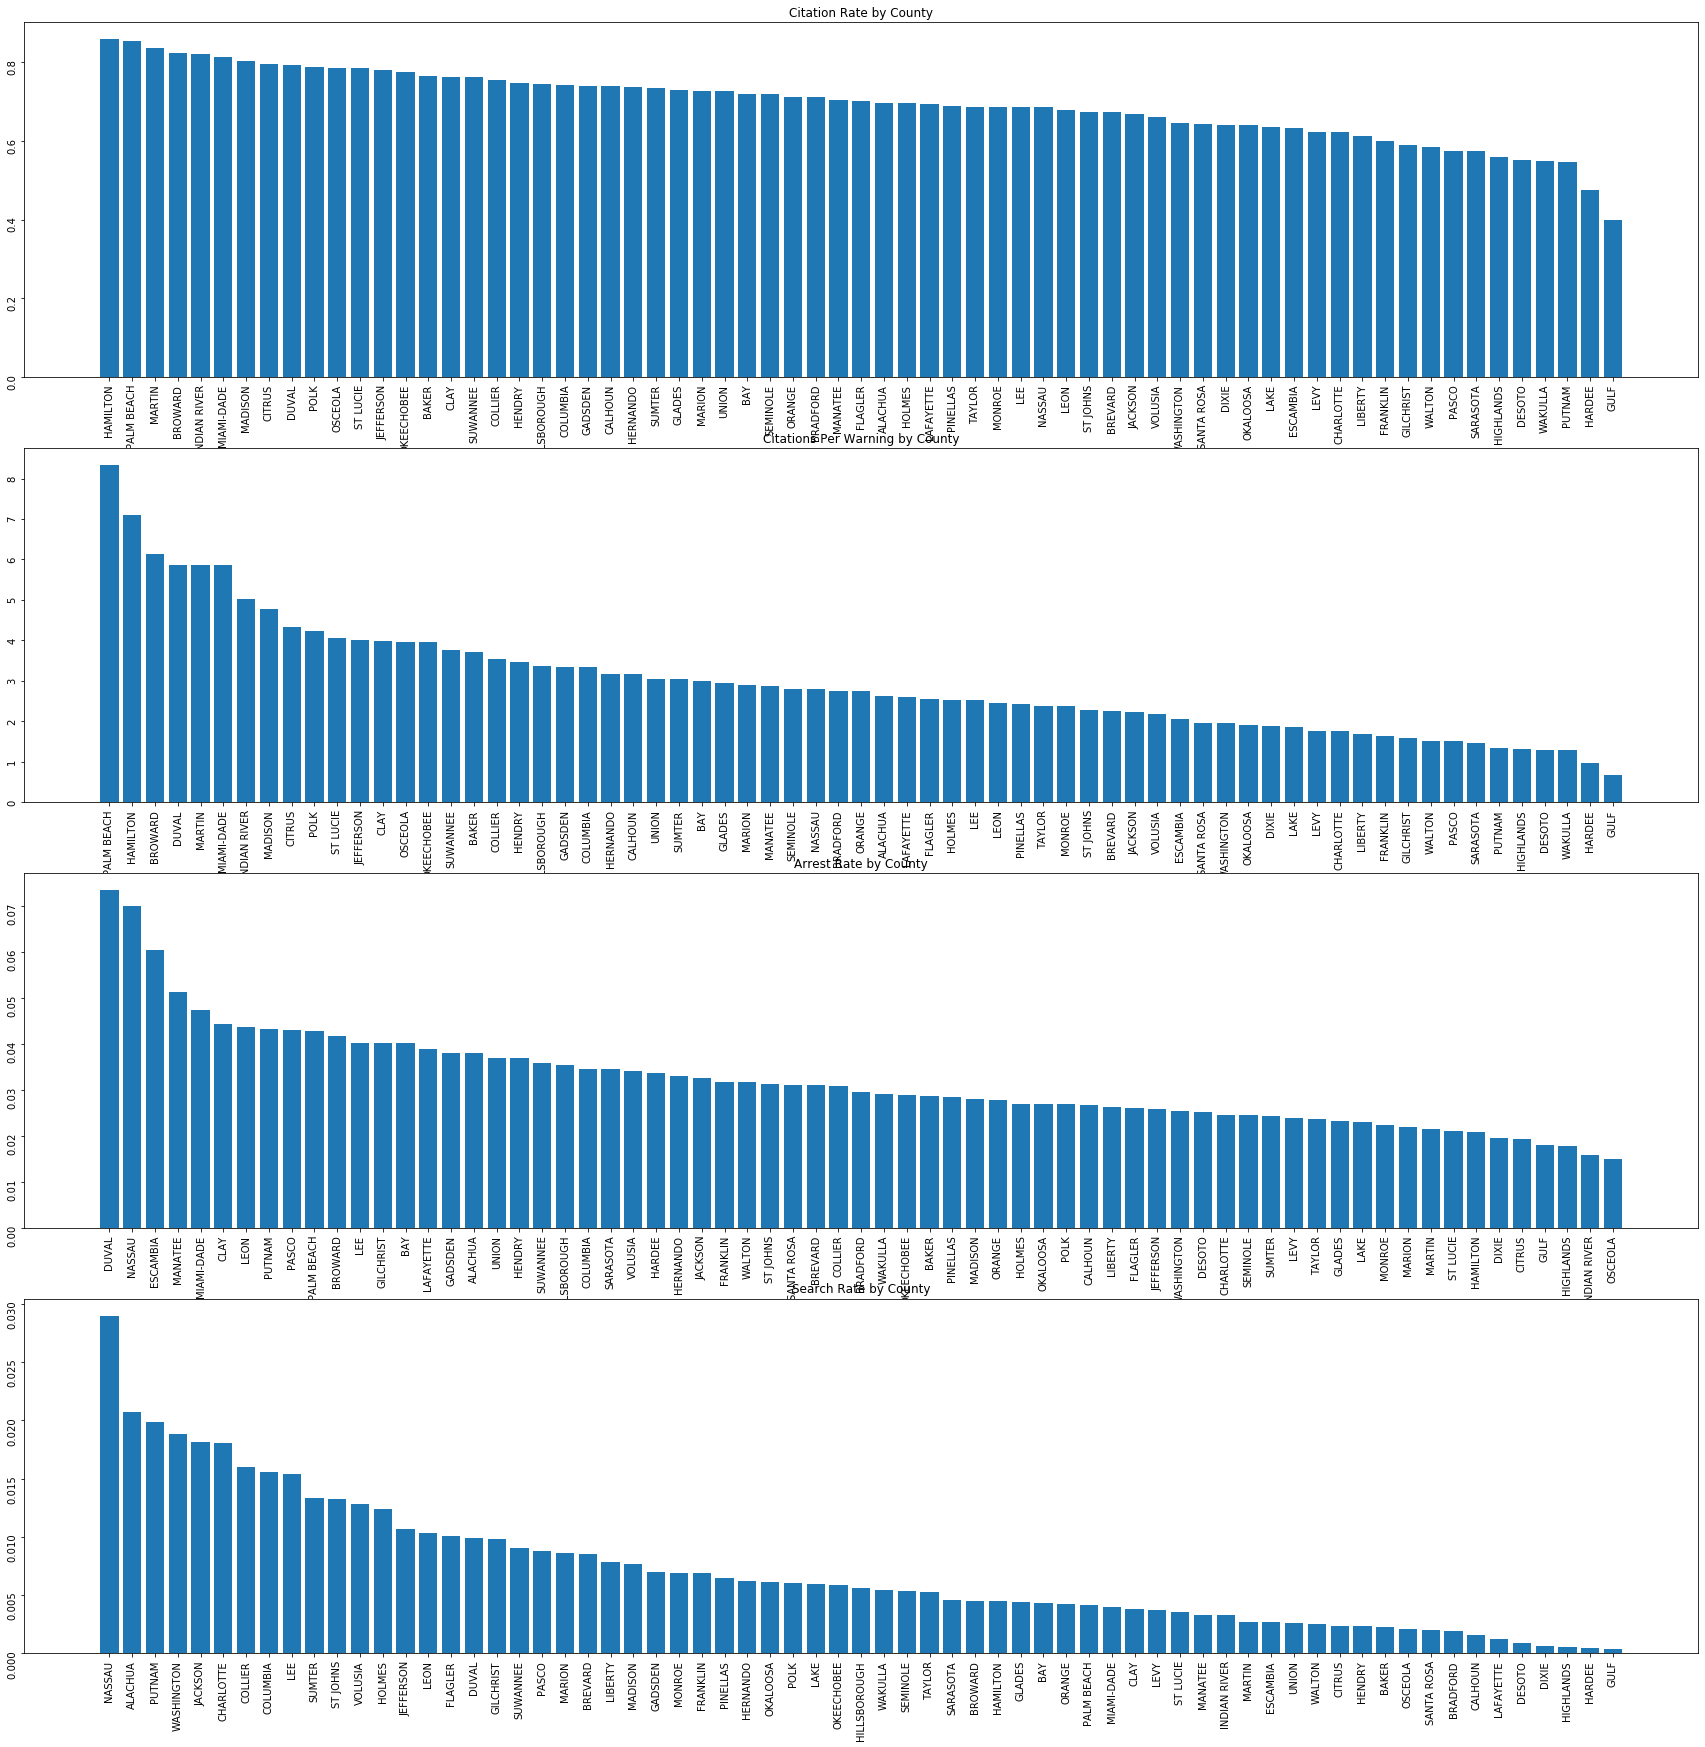

In [16]:
plot_aggs(county_agg, 'County', figsize=(30, 30), rotate_ticks=True)